In [34]:
# set multi print in one cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import mxnet as mx
import numpy as np 
from pprint import pprint 

In [35]:
# prepare data
x = np.arange(0.0,1.0,0.001)
x = x[:,np.newaxis]
y = np.sin(x)
x.shape, y.shape

((1000, 1), (1000, 1))

[('data', (1L, 1L)),
 ('fc1_weight', (10L, 1L)),
 ('fc1_bias', (10L,)),
 ('fc1_output', (1L, 10L)),
 ('act1_output', (1L, 10L)),
 ('fc2_weight', (1L, 10L)),
 ('fc2_bias', (1L,)),
 ('fc2_output', (1L, 1L)),
 ('label', (1L, 1L)),
 ('_minus7_output', (1L, 1L)),
 ('_powerscalar7_output', (1L, 1L)),
 ('loss_output', (1L, 1L))]


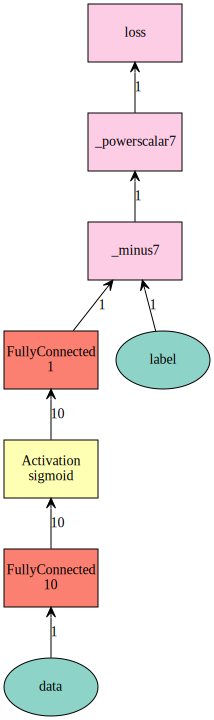

In [49]:
# prepare net work 
def get_sym():
    data = mx.sym.Variable('data')
    label = mx.sym.Variable('label')
    
    fc1 = mx.sym.FullyConnected(data=data, num_hidden = 10, name='fc1' )
    act1 = mx.sym.Activation(data=fc1, act_type='sigmoid',name='act1')
    fc2 = mx.sym.FullyConnected(data=act1,num_hidden =1, name='fc2')
    err = (fc2 - label) **2
    loss = mx.sym.MakeLoss(data = err, name= 'loss')
    net = loss
    return net 

net = get_sym()
batch_size = 1
data_shape_dict = {'data':(batch_size,1), 'label':(batch_size,1)}
net_all = net.get_internals()
arg_shape, out_shape, aux_shape = net_all.infer_shape(**data_shape_dict)
pprint( zip(net_all.list_outputs(),out_shape))
mx.viz.plot_network(net, shape= data_shape_dict)

In [60]:
# prepare data_iter 
train_iter =  mx.io.NDArrayIter(x, y, batch_size, shuffle=True, label_name = 'label')
batch = train_iter.next()
batch.data[0].asnumpy()
batch.label[0].asnumpy(), np.sin(batch.data[0].asnumpy())

array([[ 0.484]], dtype=float32)

(array([[ 0.46532345]], dtype=float32), array([[ 0.46532345]], dtype=float32))

In [55]:
# prepare module 
ctx = mx.gpu(2)
mod = mx.mod.Module(symbol = net, context = ctx, 
                    data_names =['data'], 
                    label_names = ['label'])

In [56]:
# training 
import logging 
logging.basicConfig(level=logging.INFO)
mod.fit(train_data=train_iter, 
        eval_data= None, 
        eval_metric= 'mse',
        optimizer_params=(('learning_rate', 0.1),),
        num_epoch=10)

INFO:root:Epoch[0] Train-mse=0.214760
INFO:root:Epoch[0] Time cost=0.867
INFO:root:Epoch[1] Train-mse=0.256613
INFO:root:Epoch[1] Time cost=0.986
INFO:root:Epoch[2] Train-mse=0.272037
INFO:root:Epoch[2] Time cost=0.876
INFO:root:Epoch[3] Train-mse=0.272059
INFO:root:Epoch[3] Time cost=0.978
INFO:root:Epoch[4] Train-mse=0.272086
INFO:root:Epoch[4] Time cost=0.823
INFO:root:Epoch[5] Train-mse=0.272111
INFO:root:Epoch[5] Time cost=1.037
INFO:root:Epoch[6] Train-mse=0.272135
INFO:root:Epoch[6] Time cost=0.776
INFO:root:Epoch[7] Train-mse=0.272157
INFO:root:Epoch[7] Time cost=0.529
INFO:root:Epoch[8] Train-mse=0.272177
INFO:root:Epoch[8] Time cost=0.637
INFO:root:Epoch[9] Train-mse=0.272196
INFO:root:Epoch[9] Time cost=1.039


In [39]:
?mx.sym.Activation

In [45]:
mod.fit?